In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Try reading the CSV file with different encodings
try:
    netflix = pd.read_csv('netflix data.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        netflix = pd.read_csv('netflix data.csv', encoding='latin1')
    except UnicodeDecodeError:
        netflix = pd.read_csv('netflix data.csv', encoding='utf-16')


---------------DATA CLEANING AND MODELING------------------

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
netflix.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [5]:
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [6]:
#verify no dupllicated data in csv
print(netflix.duplicated().sum())

0


In [7]:
#convert premiere to date time
netflix['Premiere'] = pd.to_datetime(netflix['Premiere'], errors='coerce')
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [8]:
#created new table and put in years of premiere
netflix['Premiere Year'] = netflix['Premiere'].apply(lambda datetime:datetime.year)
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019.0
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020.0
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019.0
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018.0
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020.0


In [9]:
#count genre
genre_count = netflix['Genre'].value_counts()
genre_count.head()

Genre
Documentary        159
Drama               77
Comedy              49
Romantic comedy     39
Thriller            33
Name: count, dtype: int64

------------------DATA VISUALIZATION---------------

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Documentary'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Romantic comedy'),
  Text(4, 0, 'Thriller'),
  Text(5, 0, 'Comedy-drama'),
  Text(6, 0, 'Crime drama'),
  Text(7, 0, 'Biopic'),
  Text(8, 0, 'Horror'),
  Text(9, 0, 'Action')])

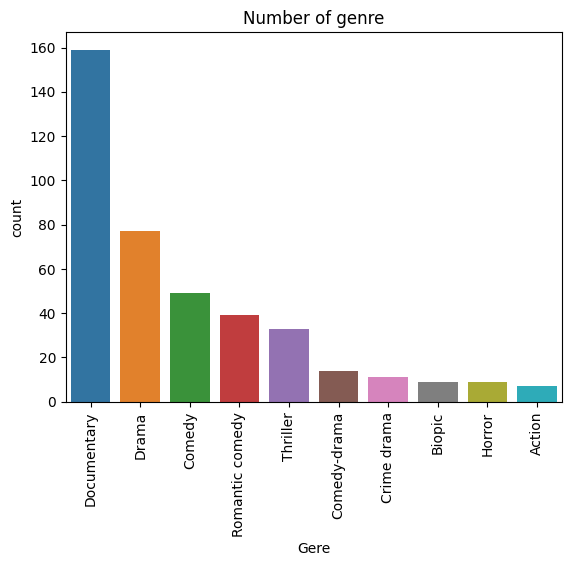

In [10]:
data = pd.DataFrame({'value': genre_count.index, 'count': genre_count.values}).head(10)
sns.barplot(data=data, x='value', y='count')
plt.title('Number of genre')
plt.xlabel('Gere')
plt.ylabel('count')
plt.xticks(rotation=90)

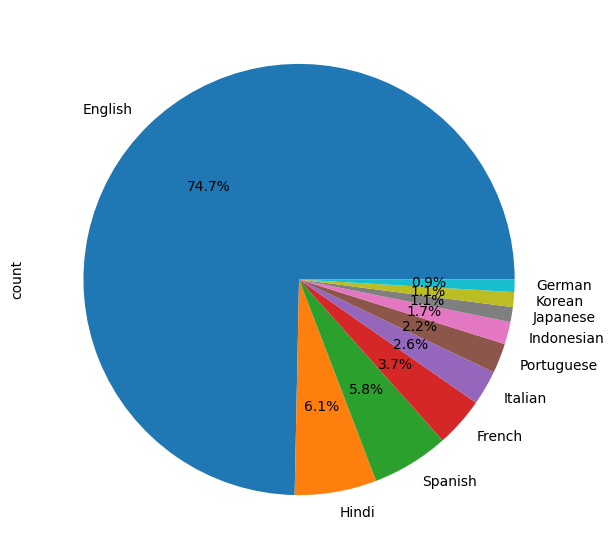

In [11]:
#count % language
language_count = netflix['Language'].value_counts().head(10)
plt.figure(figsize=(7,7))
language_count.plot.pie(autopct='%1.1f%%')
plt.rcParams['font.size'] = 10
plt.show()

We can see according to the pie chart, that the question of language, English has no rival since it is the universal language par excellence and it is the one that predominates the most in the world, which is why, in all the graphics of this project, it We will see from above in terms of languages

In [12]:
#year with most premiere
premiere_year_count = netflix['Premiere Year'].value_counts()
premiere_year_count

Premiere Year
2020.0    183
2019.0    124
2018.0     99
2021.0     71
2017.0     64
2016.0     28
2015.0      9
2014.0      1
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '2014.0'),
  Text(1, 0, '2015.0'),
  Text(2, 0, '2016.0'),
  Text(3, 0, '2017.0'),
  Text(4, 0, '2018.0'),
  Text(5, 0, '2019.0'),
  Text(6, 0, '2020.0'),
  Text(7, 0, '2021.0')])

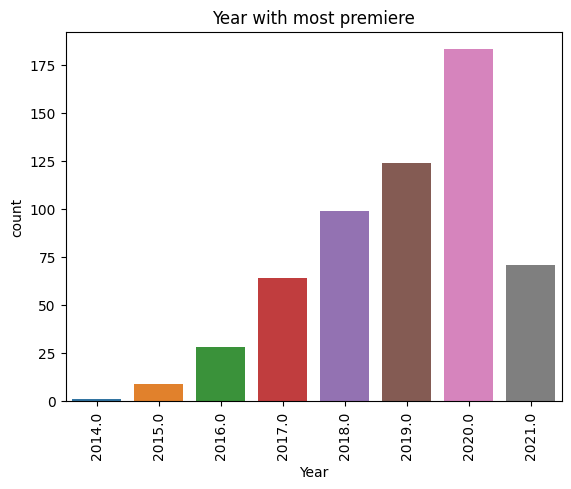

In [13]:
data = pd.DataFrame({'value': premiere_year_count.index, 'count': premiere_year_count.values}).head(10)
sns.barplot(data=data, x='value', y='count')
plt.title('Year with most premiere')
plt.xlabel('Year')
plt.ylabel('count')
plt.xticks(rotation=90)

In [14]:
netflix.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere Year
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019.0
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020.0
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019.0
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018.0
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020.0


In [15]:
#genre with most runtime
genre_time = netflix.groupby('Genre')["Runtime"].sum().sort_values(ascending=False)
genre_time.head()

Genre
Documentary        12555
Drama               8263
Comedy              4687
Romantic comedy     3927
Thriller            3469
Name: Runtime, dtype: int64

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000')])

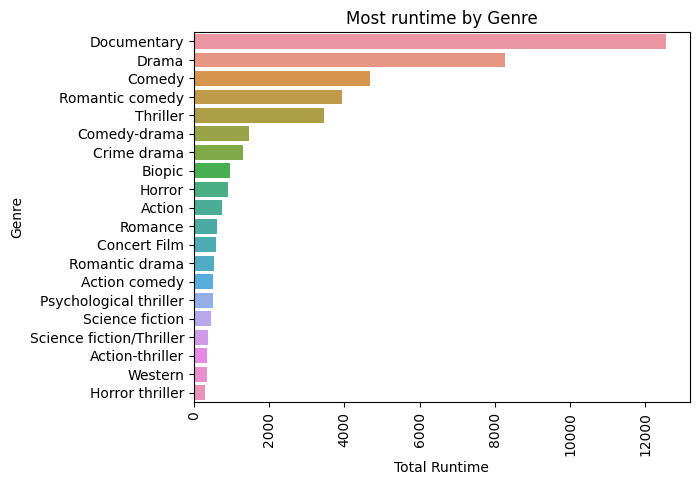

In [27]:
genre_time_data = pd.DataFrame({'locations':genre_time.index, 'count': genre_time.values}).head(20)
sns.barplot(data=genre_time_data, x='count', y='locations')
plt.title("Most runtime by Genre")
plt.xlabel('Total Runtime')
plt.ylabel('Genre')
plt.xticks(rotation=90)

Documentaries are the ones that receive the most views, taking into account their duration, which places them in first place.

In [16]:
#title with most runtime
title_time = netflix.groupby('Title')["Runtime"].sum().sort_values(ascending=False)
title_time.head()

Title
The Irishman               209
Da 5 Bloods                155
Springsteen on Broadway    153
The Forest of Love         151
Citation                   151
Name: Runtime, dtype: int64

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200'),
  Text(225.0, 0, '225')])

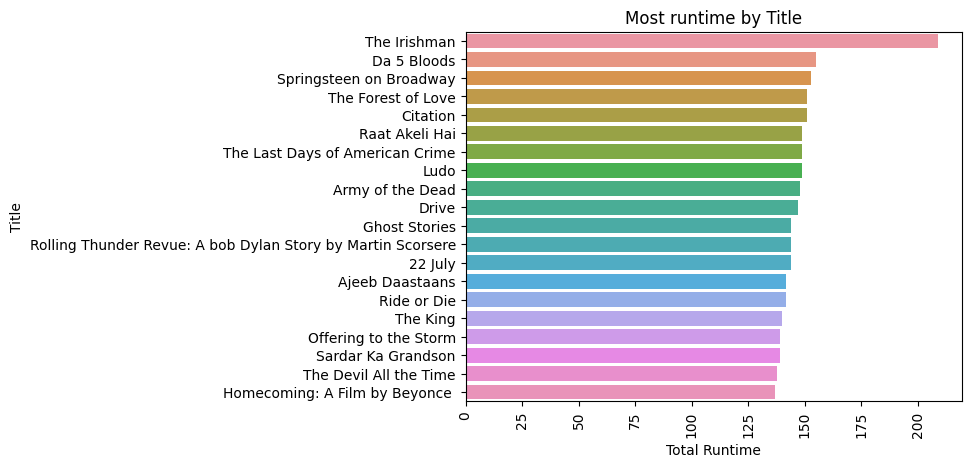

In [30]:
title_time_data = pd.DataFrame({'locations':title_time.index, 'count': title_time.values}).head(20)
sns.barplot(data=title_time_data, x='count', y='locations')
plt.title("Most runtime by Title")
plt.xlabel('Total Runtime')
plt.ylabel('Title')
plt.xticks(rotation=90)

In [17]:
#genre with most score by IMDB
genre_score = netflix.groupby('Genre')["IMDB Score"].sum().sort_values(ascending=False)
genre_score.head()

Genre
Documentary        1102.9
Drama               488.4
Comedy              269.8
Romantic comedy     228.1
Thriller            183.6
Name: IMDB Score, dtype: float64

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

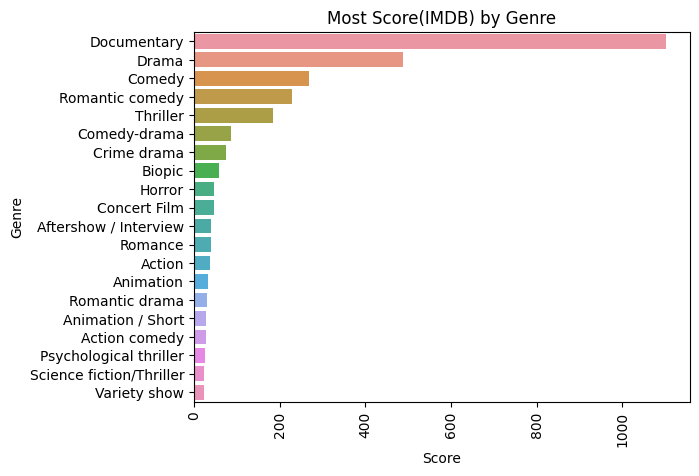

In [33]:
genre_score_data = pd.DataFrame({'locations':genre_score.index, 'count': genre_score.values}).head(20)
sns.barplot(data=genre_score_data, x='count', y='locations')
plt.title("Most Score(IMDB) by Genre")
plt.xlabel('Score')
plt.ylabel('Genre')
plt.xticks(rotation=90)

Documentaries also lead the score table given by IMDB

In [18]:
#title with most score by IMDB
title_score = netflix.groupby('Title')["IMDB Score"].sum().sort_values(ascending=False)
title_score.head()

Title
David Attenborough: A Life on Our Planet      9.0
Emicida: AmarElo - It's All For Yesterday     8.6
Springsteen on Broadway                       8.5
Ben Platt: Live from Radio City Music Hall    8.4
Taylor Swift: Reputation Stadium Tour         8.4
Name: IMDB Score, dtype: float64

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10')])

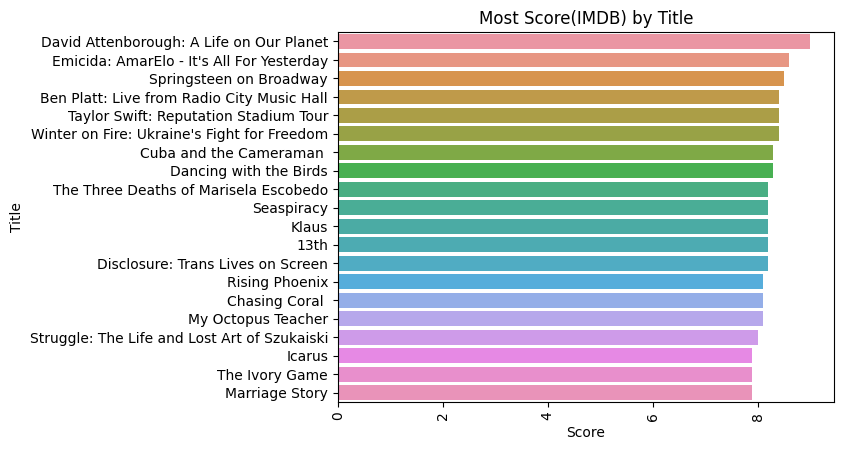

In [34]:
title_score_data = pd.DataFrame({'locations':title_score.index, 'count': title_score.values}).head(20)
sns.barplot(data=title_score_data, x='count', y='locations')
plt.title("Most Score(IMDB) by Title")
plt.xlabel('Score')
plt.ylabel('Title')
plt.xticks(rotation=90)

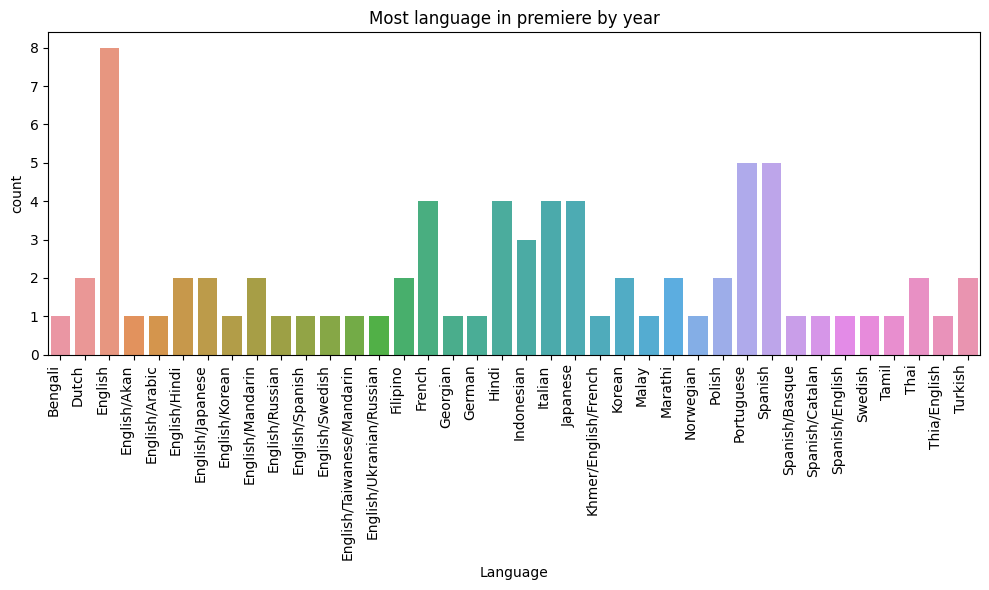

In [37]:
# Most langagues in every premiere by year
language_premiere = netflix.groupby(['Language'])['Premiere Year'].nunique().reset_index()

language_premiere.columns = ['Language', 'count']

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=language_premiere, x="Language", y="count", ax=ax)

ax.set_title('Most language in premiere by year')

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.show()

We can also translate this as the language most chosen by the public. As we mentioned before, here we can see how languages ​​advance over the years and we can also see how English continues to predominate as the primary language over the rest of the languages ​​chosen by the public to watch their series.

In [ ]:
premiere_time = netflix.groupby('Premiere')["Runtime"].sum().sort_values(ascending=False)
premiere_time.head()

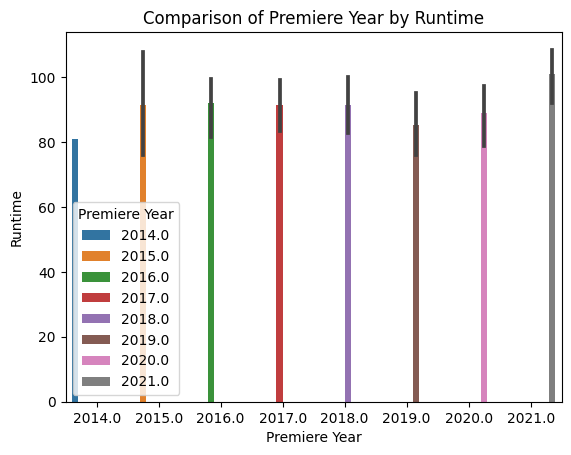

In [73]:
#growth of launches in each company over the years

premiere_time = netflix.groupby(['Premiere Year', 'Runtime']).size().reset_index(name='count')

fig, ax = plt.subplots()

sns.barplot(x='Premiere Year', y='Runtime', hue='Premiere Year', data=premiere_time, ax=ax)

ax.set_title('Comparison of Premiere Year by Runtime')

plt.show()


In [21]:
#premiere with most score by IMDB
premiere_score = netflix.groupby('Premiere')["IMDB Score"].sum().sort_values(ascending=False)
premiere_score.head()

Premiere
2020-10-02    35.9
2019-10-18    33.5
2019-11-01    30.0
2018-11-02    27.0
2020-06-19    26.3
Name: IMDB Score, dtype: float64

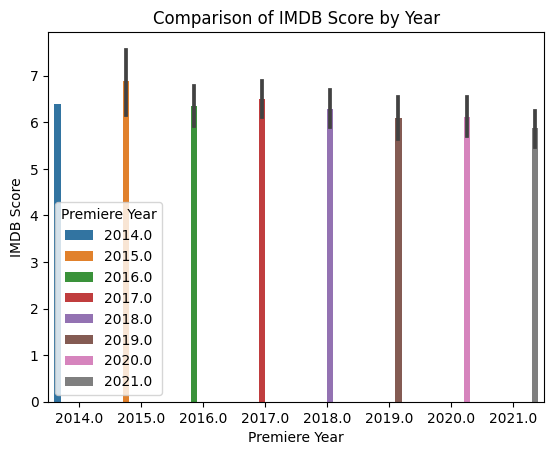

In [74]:
#growth of launches in each company over the years

premiere_score = netflix.groupby(['IMDB Score', 'Premiere Year']).size().reset_index(name='count')

fig, ax = plt.subplots()

sns.barplot(x='Premiere Year', y='IMDB Score', hue='Premiere Year', data=premiere_score, ax=ax)

ax.set_title('Comparison of IMDB Score by Year')

plt.show()

We can see that the year 2015 was the year with the best ratings during its duration in terms of series/movies and/or documentaries.

In [22]:
#language that collects the most points on IMDB
language_score = netflix.groupby('Language')["IMDB Score"].sum().sort_values(ascending=False)
language_score.head()

Language
English    2558.4
Hindi       197.4
Spanish     195.4
French      115.4
Italian      77.6
Name: IMDB Score, dtype: float64

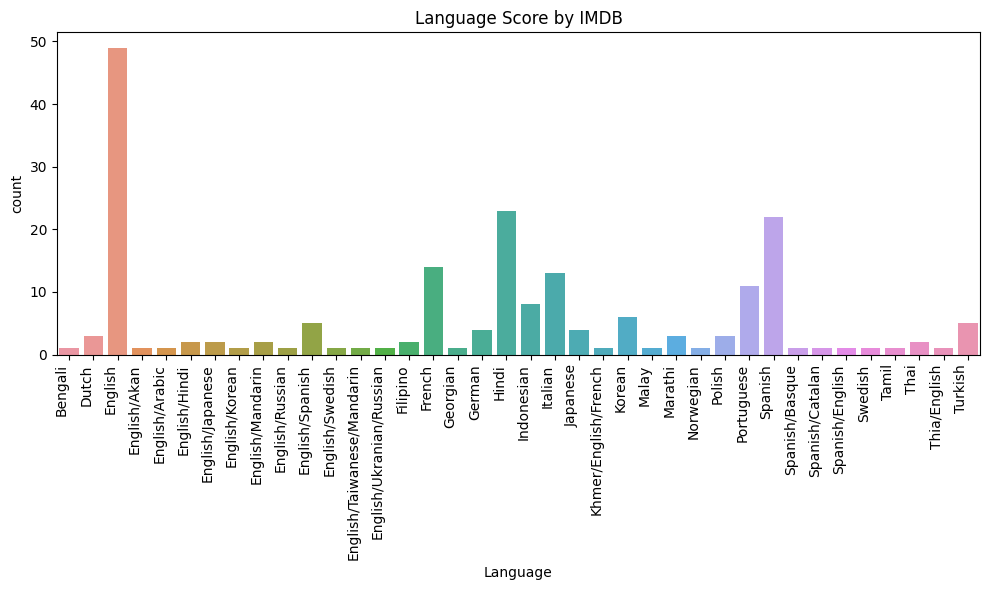

In [52]:
#language that collects the most points on IMDB graph
language_score = netflix.groupby(['Language'])['IMDB Score'].nunique().reset_index()

language_score.columns = ['Language', 'count']

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=language_score, x="Language", y="count", ax=ax)

ax.set_title('Language Score by IMDB')

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.show()

Once again, the language that most predominated and that accumulated the most points was English compared to the rest, however, Hindu, French and Spanish remain in sight.

In [68]:
#Genre with most premiere in years
genre_year = netflix.groupby('Genre')["Premiere Year"].sum().sort_values(ascending=False)
genre_year.head()

Genre
Documentary        310869.0
Drama              155498.0
Comedy              98928.0
Romantic comedy     78750.0
Thriller            66642.0
Name: Premiere Year, dtype: float64

<Axes: xlabel='Premiere Year', ylabel='Genre'>

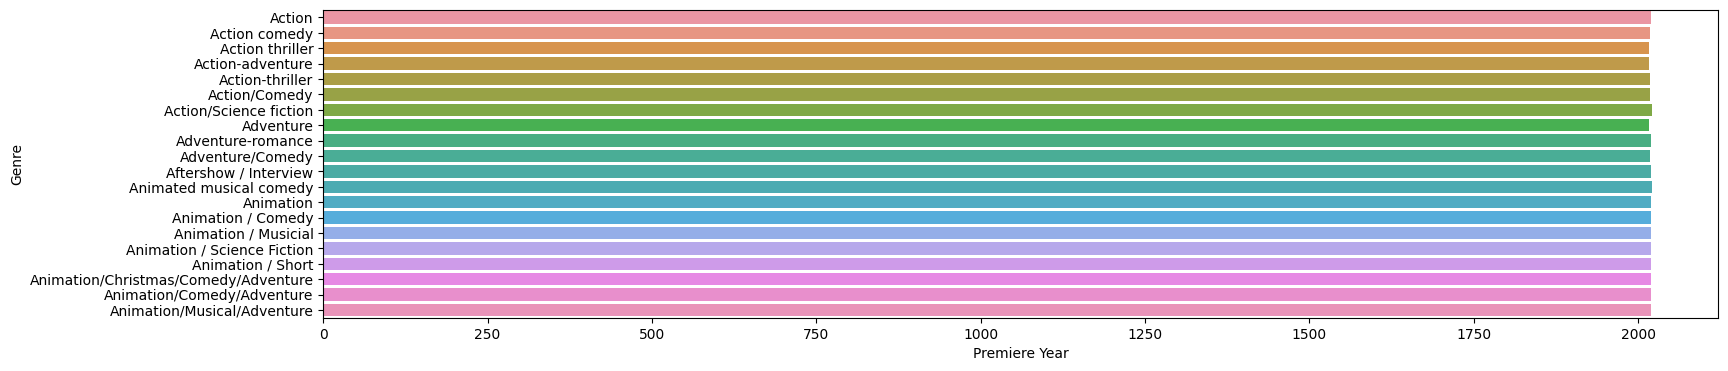

In [72]:
##Genre with most premiere in years graph
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
genre_year_mean = netflix.groupby('Genre')['Premiere Year'].mean().reset_index().head(20)
sns.barplot(x='Premiere Year', y='Genre', data=genre_year_mean)